# Tree-base model

Là thuật toán non-parametric supervised learning cho cà classification và regression thông qua bộ rule if-else

__Pros__

- Simple to understand and interpret, visualized
- Không cần thực hiện nhiều quy trình preprocessing: ko cần normalize, scaling hay categorical encoding. Tuy nhiên vẫn cần missing imputation, và nên CEncoding trong sklearn.
- Support multi-output
- White-box algorithms, nên dễ giải thích
- Có khả năng giải thích model bằng statistic test

__Cons__:

- Dễ overfitting nếu không tunning tốt, dẫn tới higher variance in the model
- Phải kết hợp trong việc sử dụng ensemble để tăng tính hiệu quả
- data trước khi fit cần phải được xử lý imbalance

__1. Terms__
- __Leaf__: End of branches of a tree
- __Loss__: tổng số records bị missclassification trong node đó. Ví dụ, trong 1 node phân loại bằng A>=m là class 1, else thì tiếp tục phân loại thì ứng với điều kiện A>=m  trên có 100 records, nhưng thực tế trong 100 records đó chỉ có 80 records là class 1, còn lại 20 records là class 0, thì loss là 20. 
- __Impurity__: Mức độ hỗn tạp của 1 partition (ngược lại là độ tinh khiết - homogeneity) sử dụng để lựa chọn split value phù hợp

    
__2. Đo lường độ Impurity/ hoặc Homogeneity__

__2.1. Gini impurity Index__: Gini index chỉ ra mức độ phan loại không chính xác khi lựa chọn ngẫu nhiên 1 feature để phân loại `Y` có được giảm hơn hay không ?

$$GiniIndex_Y = Gini_Y - \sum_{X_i∈k}[P(x∈X_i)*Gini(X_i)]$$

- Khác biệt với Information gain ở chỗ thay entropy bằng `Gini Y` = `1 - sum( P(x∈Xi)^2 )` với `P(x∈Xi)` là xác suất phần tử thuộc nhóm con `Xi` của `X`, Ta lựa chọn feature sao cho gini các node con nhỏ, tương đương với Gini Index là lớn nhất
- GiniIndex phù hợp với dữ liệu lớn, cần tối ưu về khả năng tính toán nhanh so với entropy

GiniIndex use in CART algorithm.

__2.2. Information gain (entropy)__: IG chỉ ra mức độ thông tin gain được, hay sự mất đi của tính impurity trong biến outcome `Y` khi sử dụng sự phân chia nhóm trong biến `X` nào đó. Lựa chọn `X` và tiêu chí phân nhóm `Y` theo `X` để sao cho có được IG lớn nhất.

$$I(Y,X) = H(Y) -\sum_{X_i}^{q}[{P(x∈X_i)}*H(Y|X_i)]$$
- Trong đó:
    - `I(Y|X)` là information gain của outcome Y khi biết điều kiện phân chia nhóm của feature `X`
    - `H(Y)` là entropy ban đầu của `Y` khi không dùng đk `X` trong nhóm `X`
    - `q` là các nhóm sau phân chia `X`
    - `P(x∈Xi)` là xác suất phần từ `i` thuộc nhóm `Xi` sau khi phân chia, hay bằng `size(Xi)`/`size(X)`
    - `H(Y|Xi)` là entropy của Y trong nhóm `Xi`
    
IG sử dụng trong thuật toán ID3, C4.5

___Entropy___: Thể hiện mức độ không chắc chắn về value của 1 biến X
- Entropy `H(X)`: Mức độ không chắc chắn về value của `X`
- Joint entropy `H(X,Y)`: mức độ không chắc chắn của cả 2 biến `X` và `Y` cùng lúc
- Condition entropy `H(X|Y)`: Entropy của `X` khi biết biến `Y`
- Cross Entropy `Hp(q)`: cho biết sự mức độ khác biệt giữa 2 phân bố xác suất khi dữ liệu ban đầu được mô tả theo phân phối `p` nhưng áp dụng với phân phối `q`

__2.3. Variance for regression__

__3. Stoping the tree from growing__
- `Max depth`: Chiều sâu tối đa của leaf, range 5-30
- `Min sample leaf`: Số sample tối thiểu của 1 leaf, sẽ không tạo ra các leaf có số  sample trong leaf ít hơn
- `Min sample split`: Số sample tối thiểu cần có để tiếp tục thực hiện split, nếu sample ít hơn, thực hiện assign class bằng probability lớn hơn.
- `Pruning`: quá trình loại bỏ những leaf ở dưới của full-grown tree để giảm overfitting
    - ___Reduced error pruning___:tạo validation dataset và cắt tỉa leaf node nếu tệp validation được cải thiện
    - ___Loss function___: tạo hàm loss kèm theo regularization là số lượng leaf node, cut tỉa nếu giảm được làm loss
    
__4. Application__
- Cung cấp visual tool vế các feature quan trọng, capture non-linear giữa X và Y
- Mở rộng model bằng ensemble method:
    - Classification:
    - Regression: với regression thì impurity được đo bằng Squared errors (quared deviations from the mean) và perform by RMSE

## Decision Tree

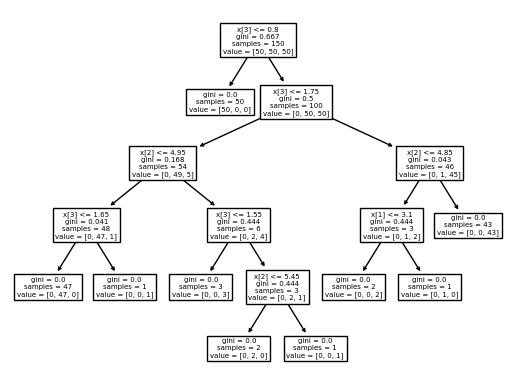

In [13]:
# classification
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score

dtc = tree.DecisionTreeClassifier(
    criterion='gini', # function đo chất lượng split
    splitter='best', # chiến lược to choose the split each node 
    max_depth=None, # độ dài tối đa của tree
    min_samples_split=2, # Số sample tối thiểu cần có để tiếp tục thực hiện split, 
                            # nếu sample ít hơn, thực hiện assign class bằng probability lớn hơn.
    min_samples_leaf=1, # Số sample tối thiểu của 1 leaf, sẽ không tạo ra các leaf có số sample trong leaf ít hơn
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0, # Node sẽ split nếu mức giảm impurity lớn hơn hoặc bằng giá trị này
    class_weight=None,
    ccp_alpha=0.0,
)
iris = load_iris()
dtc.fit(iris.data, iris.target)
# plot = tree.plot_tree(dtc,)

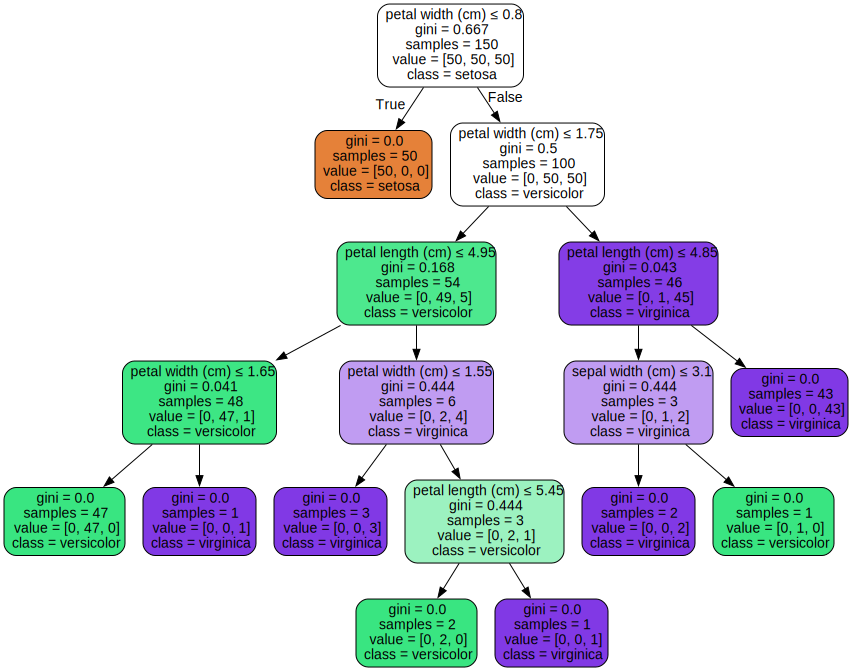

In [17]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

# render to pdf
# graph.render("iris") 